https://leetcode.com/problems/longest-increasing-subsequence/description/  
Given an integer array nums, return the length of the longest strictly increasing subsequence.

In [ ]:
class Solution {
public:
    int f(int idx, int prevIdx, int n, vector<int> &v){
        if(idx>=n) return 0;
        //In the resultant subsequence
        int notTake= 0 + f(idx+1,prevIdx,n,v);
        int take= prevIdx==-1 or v[idx]>v[prevIdx]? 1+ f(idx+1,idx,n,v):0;
        return max(notTake,take);
    }

    int lengthOfLIS(vector<int>& v) {
        int n=v.size();
        return f(0,-1,n,v);   
    }
};

In [ ]:
class Solution {
    public:
        int f(int idx, int prevIdx, int n, vector<int> &v, vector<vector<int>> &mem){
            if(idx>=n) return 0;
            //it will always be safe as prevIdx will never reach more then n-1
            if(mem[idx][prevIdx+1]!=-1) return mem[idx][prevIdx+1];
            int notTake= 0 + f(idx+1,prevIdx,n,v,mem);
            int take= prevIdx==-1 or v[idx]>v[prevIdx]? 1+ f(idx+1,idx,n,v,mem):0;
            return mem[idx][prevIdx+1]=max(notTake,take);
        }
    
    
        int lengthOfLIS(vector<int>& v) {
            int n=v.size();
            vector<vector<int>> mem(n,vector<int>(n,-1));
            return f(0,-1,n,v,mem);   
        }
    };

Converting the above to bottom top looks difficult

In [ ]:
class Solution {
    public:
        int lengthOfLIS(vector<int>& v) {
            int n = v.size();
    
            vector<vector<int>> dp(n+1, vector<int>(n + 1, 0));        
    
            for (int idx = n - 1; idx >= 0; idx--) {
                for (int prevIdx = n - 1; prevIdx >= -1; prevIdx--) {
                    int notTake = dp[idx + 1][prevIdx+1]; // f(idx + 1, prevIdx, n, v, dp);
                    int take = (prevIdx == -1 or v[idx] > v[prevIdx]) ? 1 + dp[idx + 1][idx + 1] : 0; 
                    dp[idx][prevIdx + 1] = max(notTake, take);
                }
            }
    
            return dp[0][0]; // Result is stored in dp[0][-1 + 1] == dp[0][0]
        }
};

In [ ]:
class Solution {
    public:
        int lengthOfLIS(vector<int>& v) {
            int n = v.size();
    
            // vector<vector<int>> dp(n + 1, vector<int>(n + 1, 0)); // DP table: dp[idx][prevIdx + 1]
            vector<int> curr(n+1),next(n+1);
    
            for (int idx = n - 1; idx >= 0; idx--) {
                for (int prevIdx = n - 1; prevIdx >= -1; prevIdx--) {
                    //
                    int notTake = next[prevIdx + 1]; // f(idx + 1, prevIdx, n, v, dp);
                    //
                    int take = (prevIdx == -1 || v[idx] > v[prevIdx]) ? 1 + next[idx + 1] : 0; // f(idx + 1, idx, n, v, dp);
                    curr[prevIdx + 1] = max(notTake, take);
                }
                next=curr;
            }
    
            return next[0]; // Result is stored in dp[0][-1 + 1] == dp[0][0]
        }
    };

# Priyansh technique of directly writing bottom-up dp
ppa also branched out to bottom up here

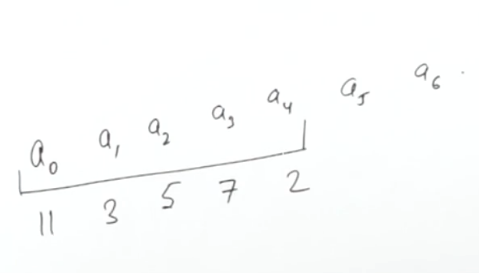

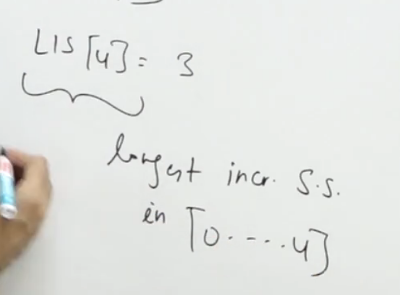

this definition is not helping us 

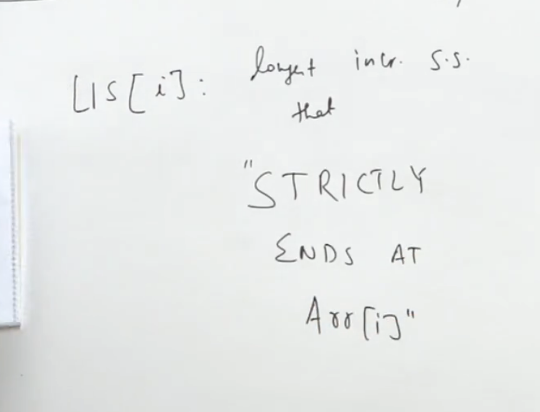

In [ ]:
int ans=1;
vector<int> dp(n,1);
for(int i=1;i<n;i++){
    for(int j=0;j<i;j++){
        if(v[j]<v[i] and dp[j]+1>dp[i]) dp[i]=dp[j]+1;
    }
    ans=max(ans,dp[i]);
}

# With BS
nlogn
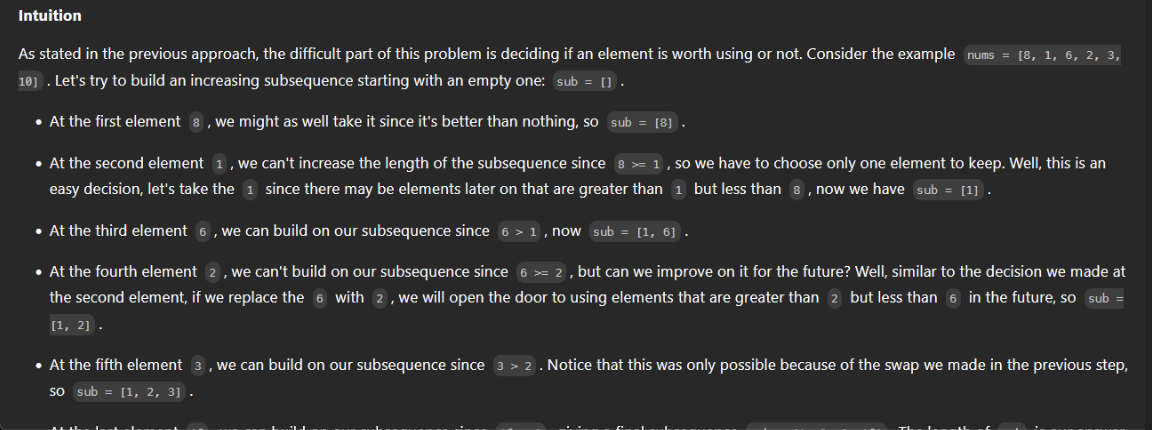

In [ ]:
//strictly increasing?
// 1 5 6 2
int lengthOfLIS(vector<int>& v) {
    int n=v.size();
    vector<int> tmp;
    tmp.push_back(v[0]);
    for(int i=1;i<n;i++){
        int x=v[i];
        if(x>tmp.back()) tmp.push_back(x);
        else{
            int idx=lower_bound(tmp.begin(), tmp.end(),x)-tmp.begin();
            tmp[idx]=x;
        }
    }
    return tmp.size();
}

In [ ]:
//non-strictly
int lengthOfLIS(vector<int>& v) {
    vector<int> tmp;
    tmp.push_back(v[0]);
    int n=v.size();
    for(int i=1;i<n;i++){
        if(v[i]>=tmp.back()) tmp.push_back(v[i]);
        else{
            int idx=upper_bound(tmp.begin(), tmp.end(),v[i])-tmp.begin();
            tmp[idx]=v[i];
        }
    }
    return tmp.size();
}
//sanity check upper and lower

In [ ]:
//q. longest decreasing subsequence strictly?
int LDS(vector<int> v){
    int n=v.size();
    vector<int> tmp;
    tmp.push_back(v[0]);
    for(int i=1;i<n;i++){
        int x=v[i];
        if(x<tmp.back()) tmp.push_back(x);
        else{
            int idx = lower_bound(tmp.begin(), tmp.end(), x, greater<int>()) - tmp.begin();
            tmp[idx]=x;
        }
    }
    return tmp.size();
}

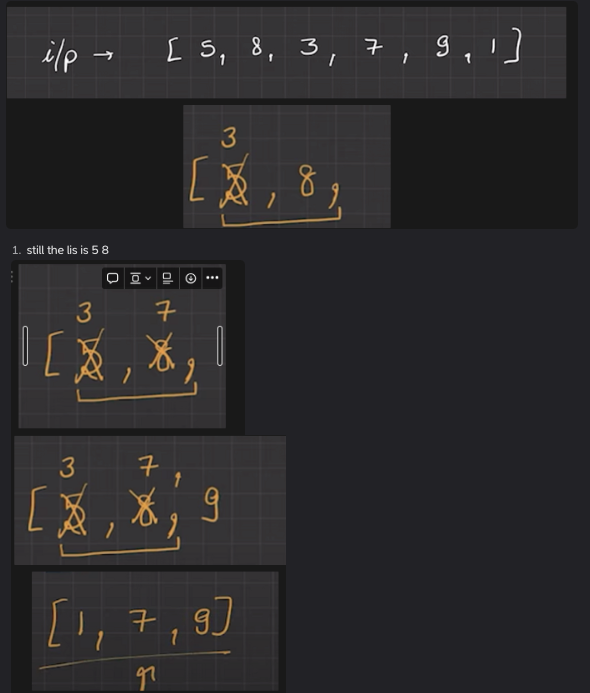

# Filling the dp vector in nlogn

In [ ]:
//strictly

In [ ]:
//non-strictly
//where dp[i] is the length of the list ending at i
vector<int> tmp,dp(n);
tmp.push_back(v[0]);
dp[0]=1;
for(int i=1;i<n;i++){
    int x=v[i];
    if(x>=tmp.back()){
        tmp.push_back(x);
        dp[i]=tmp.size();
    } 
    else{
        int idx=upper_bound(tmp.begin(), tmp.end(),x)-tmp.begin();
        tmp[idx]=x;
        //this is the only tricky part
        dp[i]=idx+1;
    }
}

q. no of lis      
https://leetcode.com/problems/number-of-longest-increasing-subsequence/description/

1 5 4 3 2 6 7 10 8 9

In [ ]:
class Solution {
public:
    int findNumberOfLIS(vector<int>& v) {
        int n=v.size(); 
        int len=1; 
        vector<int> dp(n,1),count(n,1);
        for(int i=1;i<n;i++){ 
            for(int j=0;j<i;j++){ 
                if(v[j]<v[i]){
                    ////////////////////////imp
                    if(dp[j]+1>dp[i]){
                        dp[i]=dp[j]+1;
                        count[i]=count[j];
                    }
                    else if(dp[j]+1==dp[i]){
                        count[i]+=count[j]; 
                    } 
                    ////////////////////////imp
                } 
            } 
            len=max(len,dp[i]); 
        }
        int ans=0;
        for(int i=0;i<n;i++) if(dp[i]==len) ans+=count[i];
        return ans;
    }
};

q. printing any one lis       
https://www.geeksforgeeks.org/problems/printing-longest-increasing-subsequence/0

https://youtu.be/cKVl1TFdNXg?si=qQuQVSl7b-NFI8Xf

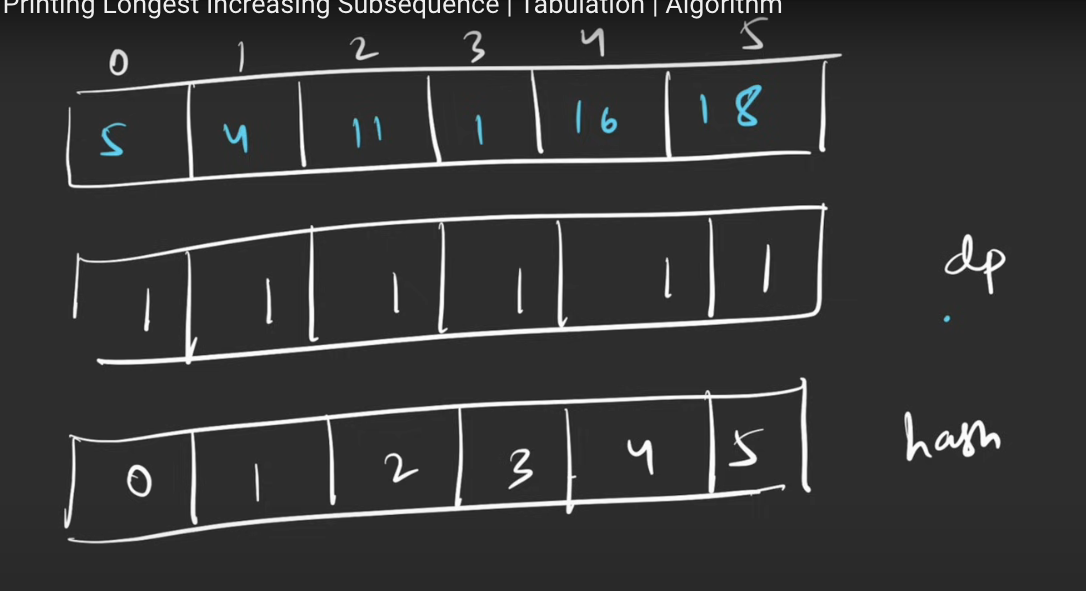
this hash array will save the previous idx

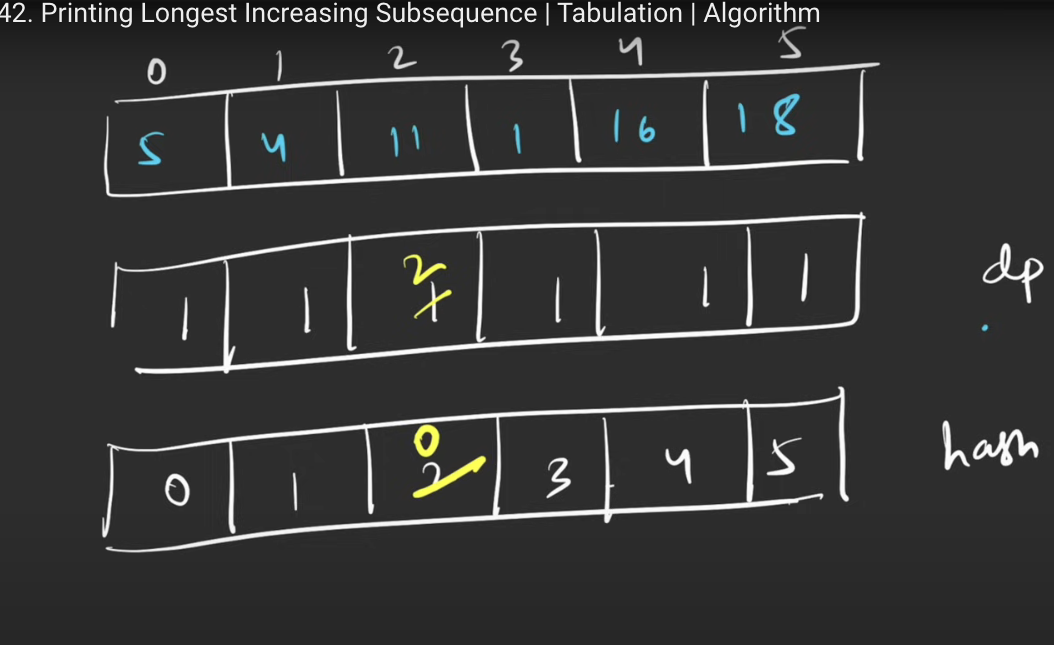

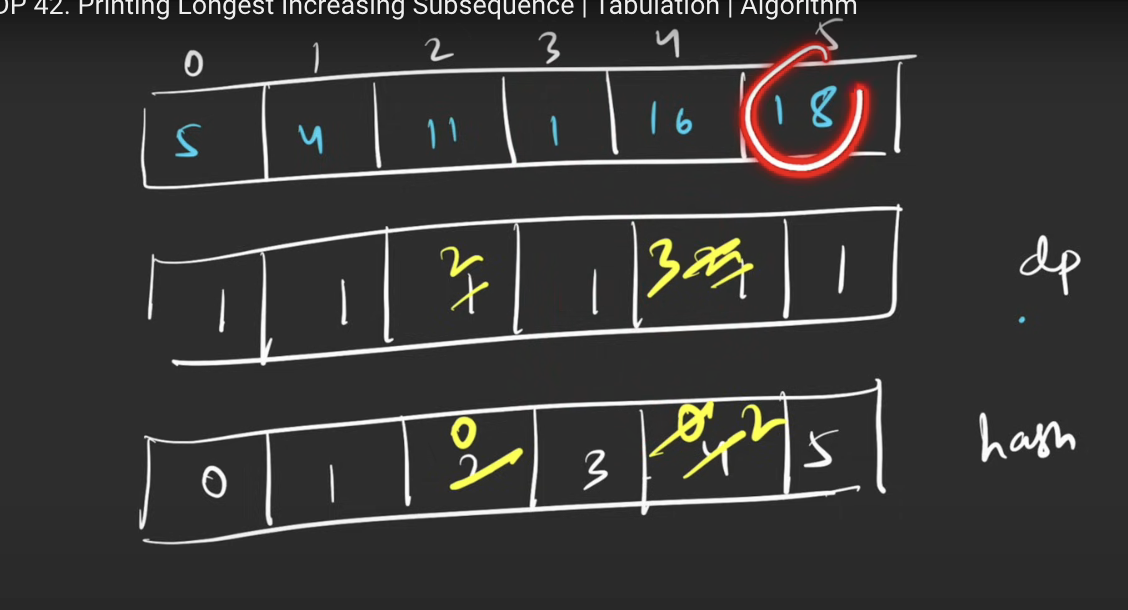

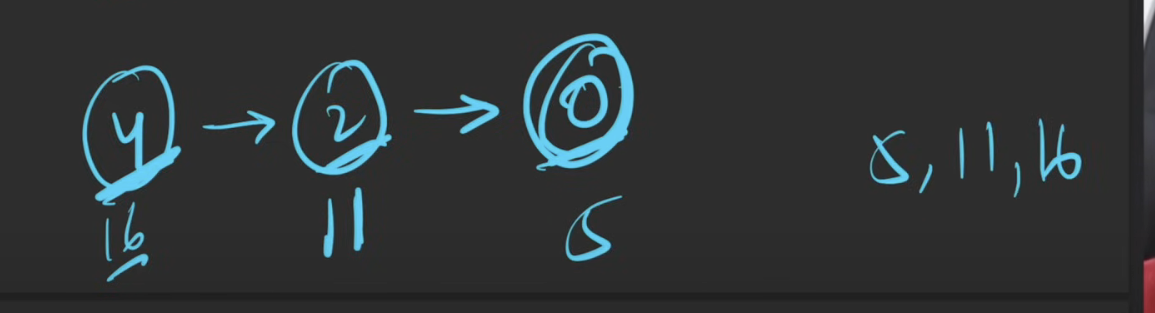

In [ ]:
#define it(v) v.begin(), v.end() 
class Solution {
  public:
        vector<int> constructLis(vector<int>& v,vector<int>& hash,int lastIdx){
            vector<int> lis;
            while(hash[lastIdx]!=-1){
                lis.push_back(v[lastIdx]);
                lastIdx=hash[lastIdx];
            }
            lis.push_back(v[lastIdx]);
            reverse(it(lis));
            return lis;
        }
        
        vector<int> getLIS(vector<int>& v) {
            int n=v.size();
            vector<int> dp(n,1),hash(n,-1);
            int maxLen=1;
            int lastIdx=0;
            for(int i=1;i<n;i++){
                for(int prevIdx=0;prevIdx<i;prevIdx++){
                    if(v[prevIdx]<v[i] and 1+dp[prevIdx]>dp[i]){
                        dp[i]=1+dp[prevIdx];
                        hash[i]=prevIdx;
                    }
                }
                if(dp[i]>maxLen){
                    maxLen=dp[i];
                    lastIdx=i;
                }
            }
            
            return constructLis(v,hash,lastIdx);
        }

};


q. Longest bitonic subsequence


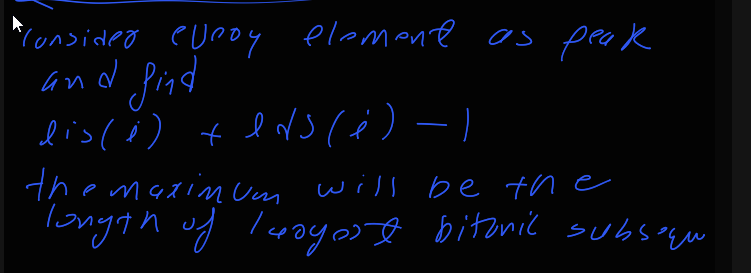

you can use bs method also to make the dp array

In [ ]:
class Solution{
	public:
	int LongestBitonicSequence(vector<int>v){
	    int n=v.size();
	    vector<int> dpi(n,1),dpd(n,1);
	    for(int i=1;i<n;i++){
	        for(int j=0;j<i;j++){
	            if(v[j]<v[i] and dpi[j]+1>dpi[i]) dpi[i]=dpi[j]+1;
	        }
	    }
	    
        //see carefully lds is taken from back
	    for(int i=n-2;i>=0;i--){
	        for(int j=n-1;j>i;j--){
	            if(v[i]>v[j] and dpd[j]+1>dpd[i]) dpd[i]=dpd[j]+1;
	        }
	    }    
	    
	    
	    int ans=1;
	    for(int i=0;i<n;i++) ans=max(ans,dpi[i]+dpd[i]-1);
	    return ans;
	}
};

q. B. Orac and Models       
https://codeforces.com/problemset/problem/1350/B

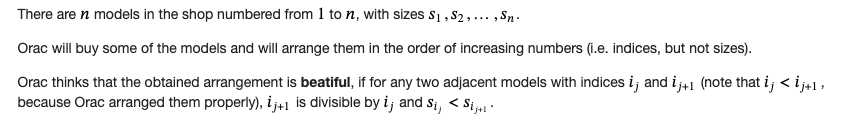

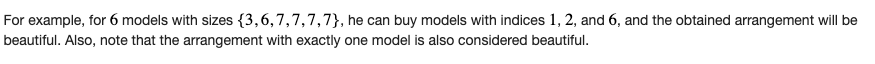

Orac wants to know the maximum number of models that he can buy

In [ ]:
void solve() {  
    iinp(n);
    vinp(v,n);
    vl dp(n,1);
    ll ans=1;
    for(ll i=0;i<n;i++){
        for(ll j=0;j*j<=i;j++){
            if((i+1)%(j+1)==0){
                if(v[j]<v[i]) dp[i]=max(dp[i],1+dp[j]);
                if(v[(i+1)/(j+1)-1]<v[i]) dp[i]=max(dp[i],1+dp[(i+1)/(j+1)-1]);
            }
            ans=max(ans,dp[i]);
        }
    }
    print(ans);
}

In [ ]:
//this sol also valid
void solve() {  
    iinp(n);
    vinp(v,n);
    vl dp(n+1,1);
    ll ans=1;
    for(ll i=1;i<=n;i++){
        for(ll j=1;j<=sqrt(i);j++){
            if(i%j==0){
                if(v[j-1]<v[i-1]) dp[i]=max(dp[i],1+dp[j]);
                if(v[i/j-1]<v[i-1]) dp[i]=max(dp[i],1+dp[i/j]);
            }
            ans=max(ans,dp[i]);
        }
    }
    pri(ans);
}

q. Given an integer array and difference, return the length of the longest subsequence in arr which is an arithmetic sequence such that the difference between adjacent elements in the subsequence equals difference.

https://leetcode.com/problems/longest-arithmetic-subsequence-of-given-difference/description/?envType=study-plan-v2&envId=dynamic-programming

In [ ]:
int longestSubsequence(vector<int>& v, int d) {
    int n=v.size();
    int ans=1;
    unordered_map<int,int> dp;
    //this is just acting like dp array
  
    for(int x: v){
        if(dp.count(x-d)) dp[x]=1+dp[x-d];
        else dp[x]=1;
        ans=max(ans,dp[x]);
    }
    return ans;
}

# Lis problems when the elements are pairs

### Cant rotate
q.                 
https://leetcode.com/problems/russian-doll-envelopes/description/

You are given a 2D array of integers envelopes where envelopes[i] = [wi, hi] represents the width and the height of an envelope.

One envelope can fit into another if and only if both the width and height of one envelope are greater than the other envelope's width and height.

Return the maximum number of envelopes you can Russian doll (i.e., put one inside the other).

Note: You cannot rotate an envelope.


In [ ]:
static bool cmp(vector<int> &v1, vector<int> &v2){
    if(v1[0]!=v2[0]) return v1[0]<v2[0];
    return v1[1]>v2[1];
}

int maxEnvelopes(vector<vector<int>>& ma) {
    sort(it(ma),cmp);
    int n=ma.size();
    vector<int> ans;
    //they will always fit into one another
    //because we have sorted heightwise  
    ans.push_back(ma[0][1]);
    for(int i=1;i<n;i++) if(ma[i][1]>ans.back()) ans.push_back(ma[i][1]);
    else{
        int idx=lower_bound(it(ans),ma[i][1])-ans.begin();
        ans[idx]=ma[i][1];
    }
    return ans.size(); 
}

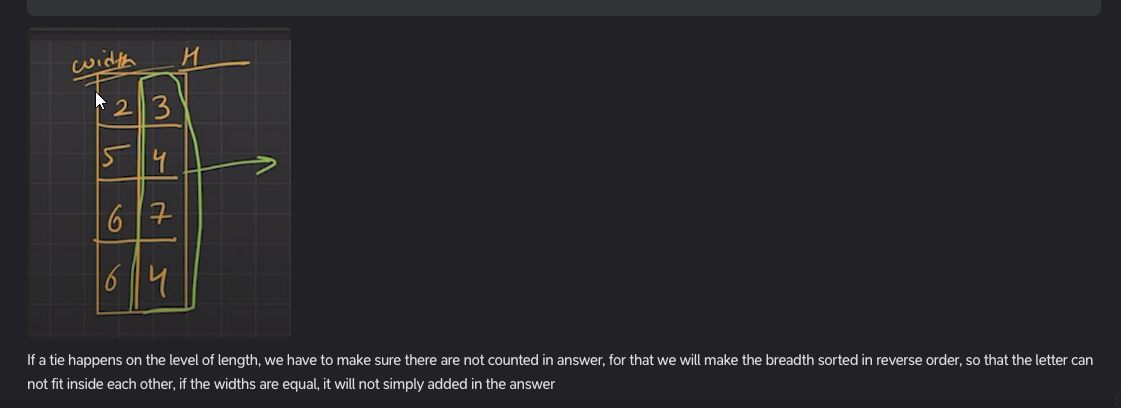

### can rotate     
# FIND OA problem

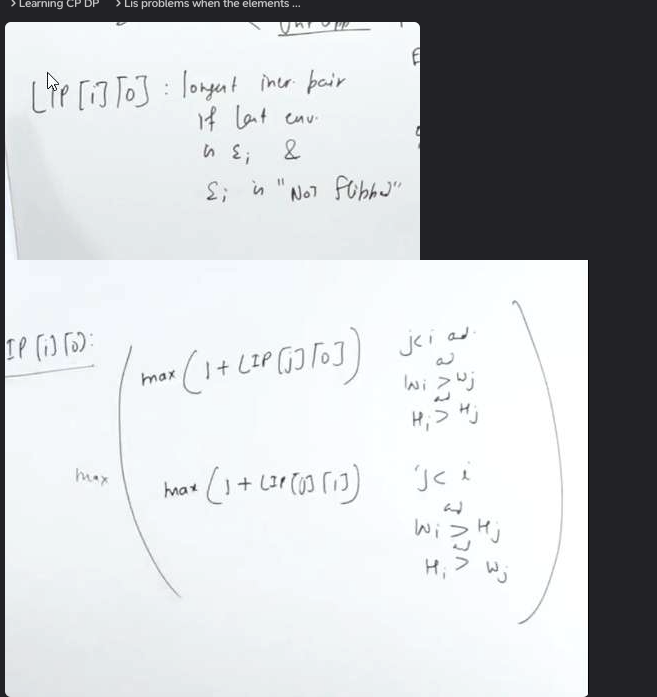

Sort based on area this time  
if a letter can fit inside a leeter its area has to be less then the later, the vice veraa it not true==> see this and understand 33 and 110

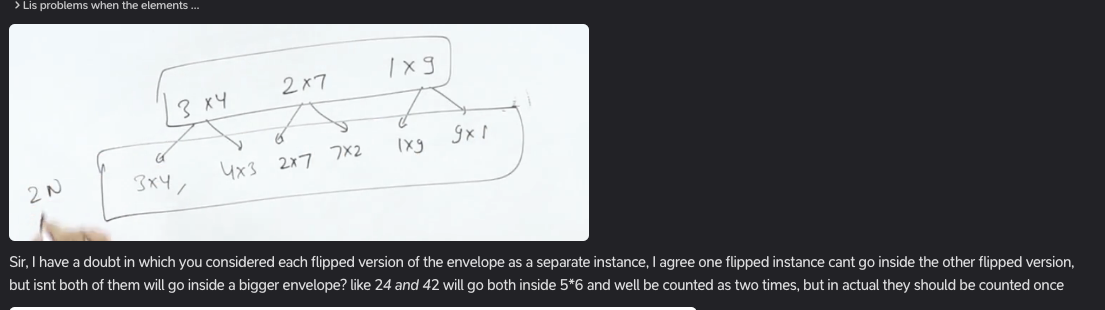

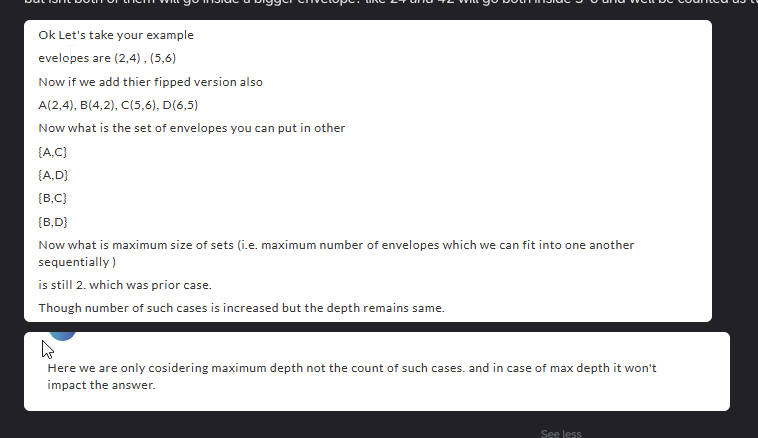

# FAANG

https://www.geeksforgeeks.org/problems/box-stacking/1

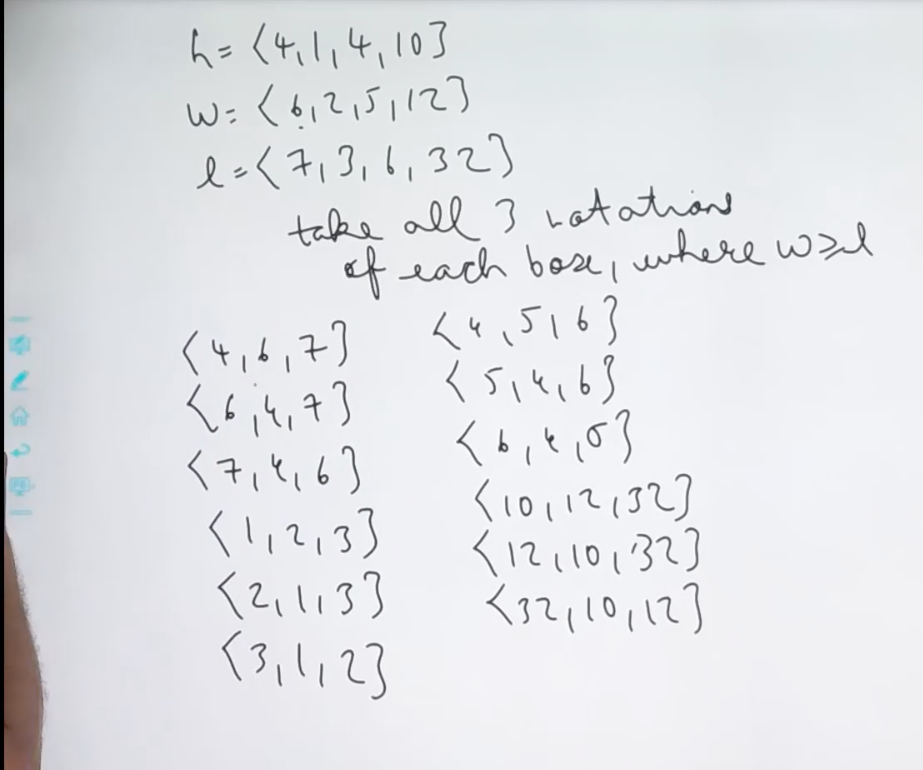

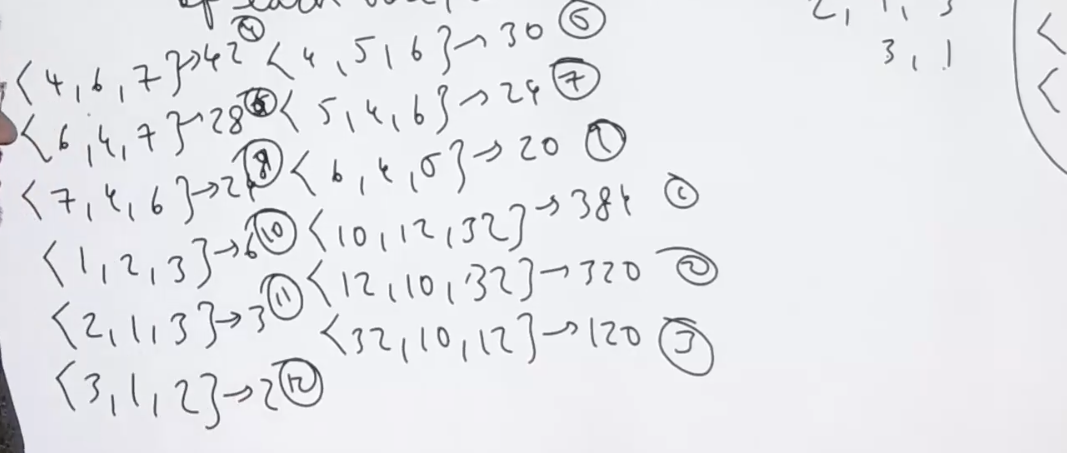

sort them in decreasing order of base area

each box can taken 6 times, but we will take only those permuatations where h>=w             


area, height, width, length

In [ ]:
#define it(v) v.begin(),v.end() 
class Solution {
  public:
    int maxHeight(vector<int> &h, vector<int> &w, vector<int> &l) {
        int n=h.size();
        vector<vector<int>> v;
        for(int i=0;i<n;i++){
            int hh=h[i],ww=w[i],ll=l[i];
            v.push_back({ww*ll,hh,max(ww,ll),min(ww,ll)});
            swap(hh,ll);
            v.push_back({ww*ll,hh,max(ww,ll),min(ww,ll)});
            swap(hh,ll);

            swap(hh,ww);
            v.push_back({ww*ll,hh,max(ww,ll),min(ww,ll)});
            swap(hh,ww);
            // v.push_back({ww*hh,ll,max(ww,hh),min(ww,hh)});
            // v.push_back({hh*ll,ww,max(hh,ll),min(hh,ll)});
        
            
            
        }
        sort(it(v),greater<vector<int>>());
        n=3*n;
        int dp[n];
        dp[0]=v[0][1];
        int ans=dp[0];

        for(int i=1;i<n;i++){
            dp[i]=v[i][1];            
            for(int j=i-1;j>=0;j--){
                if(v[j][2]>v[i][2] and v[j][3]>v[i][3]){
                    // if(dp[i]<dp[j]+v[i][1]){
                    //     dp[i]=dp[j]+v[i][1];
                    // }
                    dp[i]=max(dp[i],dp[j]+v[i][1]);
                }
            }
            ans=max(ans,dp[i]);
        }
        return ans;
    }
};